# Linear Regression
## Intro to Deep Learning Class

## Importing Libraries
Before we start, let's import some necessary libraries we will be using.

In [ ]:
import sklearn # Sklearn
!pip install -U scikit-learn
print("\n\nSklearn version: " + str(sklearn.__version__))



Sklearn version: 0.24.2


In [ ]:
import numpy as np # NumPy
import pandas as pd # Pandas
import matplotlib.pyplot as plt # Matplotlib
from IPython.display import display # For displaying the Pandas DataFrame
from sklearn.datasets import fetch_california_housing # Import data set from sklearn
from sklearn.model_selection import train_test_split # For splitting the data set into train and test sets

## Import Data set from Sklearn
We will be using a house prices data set. In this data set, we are given some information about certain California districts along with the median house price in the corresponding district. 

In this notebook, we will use Linear Regression to predict the median house price (label) using the given information about the California districts (features).

In the following code boxes, we import the data from Sklearn.

In [ ]:
data = fetch_california_housing(return_X_y=True, as_frame=True) # Import data set from sklearn and store it in "data"

In [ ]:
X, y = data # "data" is a tuple: (X,y). This line stores the x-values in "X" and the y=values in "y".
y = pd.DataFrame({"median_house_value": y}) # Convert y to a Pandas DataFrame

# Store NumPy equivalents of the X and y variables
X_np = X.values
y_np = y.values

### Quick-Look
In the following code box, we take a quick look at both the features and the labels. Note that while the $X$ and $y$ values are Pandas Data Frames, you do not need to know about these data types for this assignment.

In [ ]:
print("X-Values (Features): ")
display(X.head())
print("\n\nY-Value (Label): ")
display(y.head())

X-Values (Features): 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25




Y-Value (Label): 


,median_house_value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


## Data set Features
Here is some information about the features and labels of our data set. This information is from [Sklearn](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the provider of this data.

**X-Values (Features)**
- MedInc: Median income in block
- HouseAge: Median house age in block
- AveRooms: Average number of rooms
- AveBedrms: average number of bedrooms
- Population: Block population
- AveOccup: Average house occupancy
- Latitude: House block latitude
- Longitude: House block longitude

**Y-Value (Label)**
- Label: Median house value for California districts

In [ ]:
m = X.shape[0]
n = X.shape[1]
print("Number of examples: " + str(m))
print("Number of features: " + str(n))

Number of examples: 20640
Number of features: 8


## Data set Shape
In the last code box, we found that our data set has 20,640 examples and 8 features. This kind of familiarity with the data set is always nice to know before creating the Machine Learning model. 

## Separating Train and Test Sets
There are 20,640 examples in our data set. We will use about 90% of this data for training our Linear Regression model, and the remaining 10% of the data to evaluate our model. 

In the following code box, we split the data set into train and test sets. We will also keep NumPy array versions of the $X$ and $y$ values for training our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0)

# For the NumPy versions of the variables, we transpose them so that the examples are in the columns
X_train_np = X_train.values.T
X_test_np = X_test.values.T
y_train_np = y_train.values.T
y_test_np = y_test.values.T

m_train = X_train.shape[0]
m_test = X_test.shape[0]

print("Number of examples in train set: " + str(m_train))
print("Number of examples in test set:\t " + str(m_test))

Number of examples in train set: 18576
Number of examples in test set:	 2064


## Normalization
For Linear Regression, we must **normalize** our values. In this case, that means bringing the mean to 0 and the standard deviation to 1 using the following code box. Note that we only do this for the X-Values (Features).

In [ ]:
# X_train_np normalization
X_train_np_mean = np.mean(X_train_np, axis=0)
X_train_np_std = np.std(X_train_np, axis=0)
X_train_np_norm = (X_train_np - X_train_np_mean)/X_train_np_std

# X_test_np normalization
X_test_np_mean = np.mean(X_test_np, axis=0)
X_test_np_std = np.std(X_test_np, axis=0)
X_test_np_norm = (X_test_np - X_test_np_mean)/X_test_np_std

## Gradient Descent
Now we will move onto the Linear Regression model. For Linear Regression, we use Gradient Descent. These are the steps of Gradient Descent (the parameter initialization is specific to Linear Regression, but most of these steps are applied to (mostly) all types of Machine Learning and Deep Learning algorithms): 
1. Initialize Parameters
> For Linear Regression, we initialize all parameters to 0.
2. Hypothesis Function
> Use the paramters and input features to compute the hypothesis $\hat{y}$. 
3. Cost Function
> Use the prediction $\hat{y}$ and the real label $y$ to compute the Mean Squared Error (MSE) cost function.
4. Parameter Update
> Compute the parameter update for all parameters and update them using the appropriate learning rate $\alpha$ (alpha).
5. Repeat!
> Repeat Steps 2-4 many times until the cost is sufficiently low.

In the following code boxes, we will write code for each of these steps. In the end, we will put these together to train the Linear Regression model.

### 1. Initialize Parameters
Since there are 8 features, we will have 9 parameters (weights). 

We will initialize 8 of these to 0 and store them in $W$. Remember, $W$ should be a row vector, so its shape should be $(1,8)$.

There is also 1 bias parameter which we will call $b$. We will also initialize this to 0.

Therefore, there are 9 parameters total. In the following code box, we create a function that initializes the parameters.

In [ ]:
def initialize_parameters():
  W = np.zeros((1,8))
  b = 0
  return W, b

### 2. Hypothesis Function
Recall that the hypothesis function for Linear Regression is:
$$\hat{\textbf{Y}}=h(\textbf{X},b,\textbf{W})=\textbf{W}\times \textbf{X} + b,$$
where $\times$ represents matrix multiplication. In Python code, this would be:
```
y_hat = np.dot(W, X) + b
```
In the next code box, we create the hypothesis function.


In [ ]:
def hypothesis(X, b, W):
  y_hat = np.dot(W, X) + b
  return y_hat

### 3. Cost Function
Now, we define the cost function using $\hat{\textbf{Y}}$ and $\textbf{Y}$. Remember, when $\hat{\textbf{Y}}$ and $\textbf{Y}$ are matrices, the cost function is defined as follows:
$$J(\textbf{X},b,\textbf{W})=\frac{1}{2m} \text{sum}\left[(\textbf{Y}-\hat{\textbf{Y}})^2\right],$$
where ''$-$'' and the squaring operation represent element-wise subtraction and squaring. In Python code, this would be:
```
J = 1/(2*m) * np.sum((y - y_hat)**2)
```
(Sidenote: For the Python function, instead of passing in $\textbf{X}$, $b$, and $\textbf{W}$, we will simply pass in $\hat{\textbf{Y}}$ (which we computed in the last step). Additionally, we will pass in $\textbf{Y}$ and $m$.) 

In the next code box, we create the cost function.

In [ ]:
def cost(y_hat, y, m):
  J = 1/(2*m) * np.sum((y - y_hat)**2)
  return J

### 4. Parameter Update
After computing the cost, we have to adjust our parameters. Recall that the parameter update for $\textbf{W}$ is:
$$W:=W-\alpha\cdot \frac{dJ}{d\textbf{W}}.$$
Similarly, this is how we update $b$:
$$b:=b-\alpha\cdot \frac{dJ}{db}.$$
Additionally, here are the values for $\frac{dJ}{d\textbf{W}}$ and $\frac{dJ}{db}$:

\begin{align*}
\frac{dJ}{d\textbf{W}}&=\frac{1}{m}\cdot (\hat{\textbf{Y}}-\textbf{Y})\times \textbf{X}^T\\
\frac{dJ}{db}&=\frac{1}{m}\cdot \text{sum}(\hat{\textbf{Y}}-\textbf{Y})
\end{align*}

In Python code, these 4 equations would be:
```
W = W - alpha * dJdW
b = b - alpha * dJdb
dJdW = 1/m * np.dot((y_hat-y), X.T)
dJdb = 1/m * np.sum(y_hat-y)
```
Note that in Python, we will run the last two lines of codes first (otherwise we will get an error). In the next code box, we create a function to update our parameters. 

In [ ]:
def parameter_update(X, y_hat, y, m, alpha, W, b):
  dJdW = 1/m * np.dot((y_hat-y), X.T)
  dJdb = 1/m * np.sum(y_hat-y)

  W = W - alpha * dJdW
  b = b - alpha * dJdb

  return W, b

### Put it all together!
We will now do Step 5 of Gradient Descent (Repeat!) by putting all of the previous functions together into a model function. This is what we will do in this function:
1. Initialize Parameters

For as many iterations as we chose to train our model:
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters

Finally, we return the learned parameters $\textbf{W}$ and $b$. While training the model, we will print the cost on the train set every few iterations and, along with this, the cost on the test set. We will keep track of these costs and return some values that are helpful in graphing our performance.

In the following code box, we create the model function.

In [ ]:
def model(X_train, y_train, m_train, X_test, y_test, m_test, alpha=0.1, iterations=1000):
  # Initialize Parameters
  W, b = initialize_parameters()

  # Keep track of costs for train and test sets
  iteration_nums = [] # X-value for performance graph
  costs_train = []
  costs_test = []

  # Repeat the following steps of Gradient Descent using a for-loop
  for i in range(iterations):
    # Compute Hypothesis
    y_hat = hypothesis(X_train, b, W)

    # Compute Cost Function for train set and test set and print this out
    # Only do this once every 100 iterations
    if i % 100 == 0:
      iteration_nums.append(i) # Add iteration number to list of iteration numbers
      cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
      costs_train.append(cost_train) # Add cost to list of train costs
      y_hat_test = hypothesis(X_test, b, W) # Compute hypothesis for test set
      cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
      costs_test.append(cost_test) # Add cost to list of test costs
      print("\n\nIteration " + str(i))
      print("Train set cost: " + str(cost_train))
      print("Test set cost: " + str(cost_test))
    
    # Update Parameters
    W, b = parameter_update(X_train, y_hat, y_train, m_train, alpha, W, b)
  
  # Print final costs for train and test sets
  iteration_nums.append(iterations) # Add iteration number to list of iteration numbers
  y_hat = hypothesis(X_train, b, W) # Compute hypothesis for train set
  cost_train = cost(y_hat, y_train, m_train) # Compute cost for train set
  costs_train.append(cost_train) # Add cost to list of train costs
  y_hat_test = hypothesis(X_test, b, W) # Compute hypothesis for test set
  cost_test = cost(y_hat_test, y_test, m_test) # Compute cost for test set
  costs_test.append(cost_test) # Add cost to list of test costs
  print("\n\n")
  print("Final train set cost: " + str(cost_train))
  print("Final test set cost: " + str(cost_test))

  # Return learned parameters
  return W, b, iteration_nums, costs_train, costs_test

## Training the Model
Finally, we get to train the Linear Regression model. In the next code box, we run the model function with the appropriate arguments and store the learned parameters in the variables $\textbf{W}$ and $b$. Note that we feed in the NumPy version of all variables to avoid any errors.

In [ ]:
W, b, iteration_nums, costs_train, costs_test = model(X_train=X_train_np_norm, y_train=y_train_np, m_train=m_train, X_test=X_test_np_norm, y_test=y_test_np, m_test=m_test, alpha=0.1, iterations=100000)

Streaming output truncated to the last 5000 lines.


Iteration 100
Train set cost: 0.6627961540583556
Test set cost: 0.686252753742959


Iteration 200
Train set cost: 0.662137352632664
Test set cost: 0.6856336959555863


Iteration 300
Train set cost: 0.6616676183622341
Test set cost: 0.6852013014094194


Iteration 400
Train set cost: 0.6612133279879888
Test set cost: 0.6847853347743735


Iteration 500
Train set cost: 0.6607665818480404
Test set cost: 0.6843760740100612


Iteration 600
Train set cost: 0.6603266837583697
Test set cost: 0.6839723327249306


Iteration 700
Train set cost: 0.6598932703321372
Test set cost: 0.6835736726348833


Iteration 800
Train set cost: 0.6594660120187719
Test set cost: 0.6831797870689245


Iteration 900
Train set cost: 0.6590445989977314
Test set cost: 0.6827904097646668


Iteration 1000
Train set cost: 0.6586287394848532
Test set cost: 0.6824052956052071


Iteration 1100
Train set cost: 0.6582181586410808
Test set cost: 0.6820242156481118


Iteration 12

## Plotting Results

Now, we plot our results to visualize how the model learned. In the following code box, we use matplotlib and the costs from the model training to create a graph with: 

$x$-axis: # of Iterations;

$y$-axis: Cost.

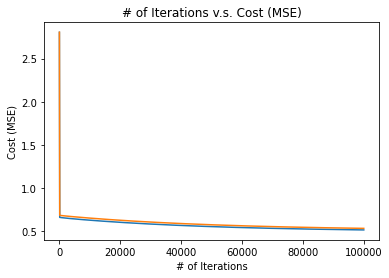

In [ ]:
plt.plot(iteration_nums, costs_train, label="Train set Cost")
plt.plot(iteration_nums, costs_test, label="Test set Cost")
plt.title("# of Iterations v.s. Cost (MSE)")
plt.xlabel("# of Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

This plot is a bit zoomed out, so we will zoom in by only plotting the first 100 iterations onward.

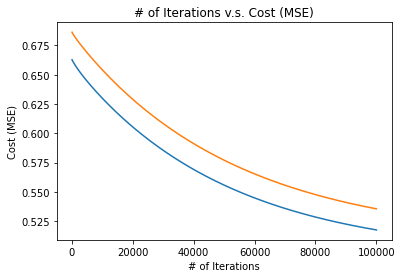

In [ ]:
plt.plot(iteration_nums[1:], costs_train[1:], label="Train set Cost")
plt.plot(iteration_nums[1:], costs_test[1:], label="Test set Cost")
plt.title("# of Iterations v.s. Cost (MSE)")
plt.xlabel("# of Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

## Making Predictions
In the next code box, we make predictions for some value in the test set. We will print out the prediction along with the real value.

Feel free to play around with this code and make predictions on different examples.

In [ ]:
example_num = 10 # This is the example number. 
# Feel free to change it, but make sure that it is a non-negative number less than 2064 to avoid indexing errors. 
hypothesis_example = hypothesis(X_test_np_norm[:,example_num], b, W)[0]
real_label_example = y_test_np[:,example_num][0]
print("Hypothesis: " + str(round(hypothesis_example, 3)))
print("Real Label: " + str(round(real_label_example, 3)))

Hypothesis: 2.084
Real Label: 2.379


## Congratulations!
You have now implemented a Linear Regression model from scratch. You should be proud of yourself!

The main takeaway from this assignment is the Gradient Descent algorithm, which has the following steps:

1. Initialize Parameters
2. Compute Hypothesis
3. Compute Cost Function
4. Update Parameters
5. Repeat!

I hope you had fun!